In [3]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

In [5]:
#
import sys
sys.path.append('./')

In [6]:
# General imports
import json
from qiskit import QuantumCircuit
import numpy as np
from dataclasses import dataclass
from enum import auto, Enum

In [7]:
@dataclass
class SchedulerType(Enum):
    """The type of scheduler to use."""

    BASELINE = auto()
    SIMPLE = auto()
    EXTENDED = auto()  

In [8]:
# Configuration
# 1. Number of Jobs in the batch
jobs = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
# 2. Number of machines
machines = {"QUITO": 5, "BELEM": 5}
# 3. Scheduling type
name_schedule = SchedulerType.EXTENDED


In [9]:
# Setup
if name_schedule == SchedulerType.EXTENDED:
    from src.algorithm import MILQ_extend
    bigM = 1000
    timesteps = 2**6

In [10]:
# Scheduler
MILQ_extend.example_problem(bigM, timesteps, "./results/MILQ/MILQ_extend")


Processing times for 0: [0, 0]
Processing times for A: [8, 9]
Processing times for B: [8, 10]
Setup times for 0 and 0: [50, 50]
Setup times for 0 and A: [0, 0]
Setup times for 0 and B: [0, 0]
Setup times for A and 0: [50, 50]
Setup times for A and A: [50, 50]
Setup times for A and B: [9, 6]
Setup times for B and 0: [50, 50]
Setup times for B and A: [7, 7]
Setup times for B and B: [50, 50]
Problem:
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x72cb2073bfa0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x72cb20739600>]
Job Capacities:
{'A': 2, 'B': 3}
Run info
Jobs in define_lp:
['0', '1', '2']
Jobs:
2
3
Jobs in set_up_extended_lp:
0
1
2
Machines in set_up_extended_lp:
QUITO
BELEM
Process times:
[[0, 0], [8, 9], [8, 10]]
Process times:
defaultdict(<function __makeDict.<locals>.<lambda> at 0x72cb1234a0e0>, {'1': defaultdict(<function __makeDict.<locals>.<lambda> at 0x72cb12349d80>, {'QUITO': 0, 'BELEM': 0}), '2': defaultdict(<function __makeDict.<locals>.<lambda> 

  job  qubits machine  capacity  start  end  duration
0   A       2   BELEM         5    0.0  0.0       0.0
1   B       3   QUITO         5    0.0  8.0       8.0


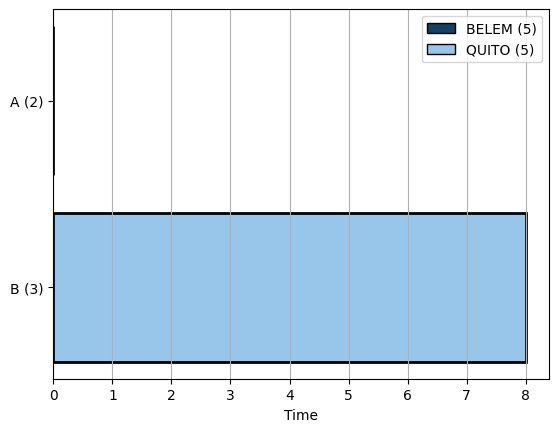

In [11]:
# Visualize
from visualize import visualize_lp

visualize_lp.visualize("results/MILQ/MILQ_extend.json")


In [12]:

# Analyze